### In this document, we recreate the $\Delta R$ between the lepton pairs graph from the Analysis note( Figure 5)

### process all the data sets required in the analysis , we use the same files used in the dark photon Pt analysis. Also we use the runner method to process all the data.

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 

<module 'sidm.tools.sidm_processor' from '/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/sidm_processor.py'>

In [2]:
samples = [
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_5GeV_2mm",
    "2Mu2E_500GeV_5GeV_0p8mm",
    "2Mu2E_800GeV_5GeV_0p5mm",
    "2Mu2E_1000GeV_5GeV_0p4mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")



In [3]:

ch = "2mu2e"
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "no_lj_selection",
        "2mu2e",
        
        
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)



Output()

Output()

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

### Here we plot the the $\Delta R$ between the 2 pairs of election for the two selection( no lj selection and 2mu2e)

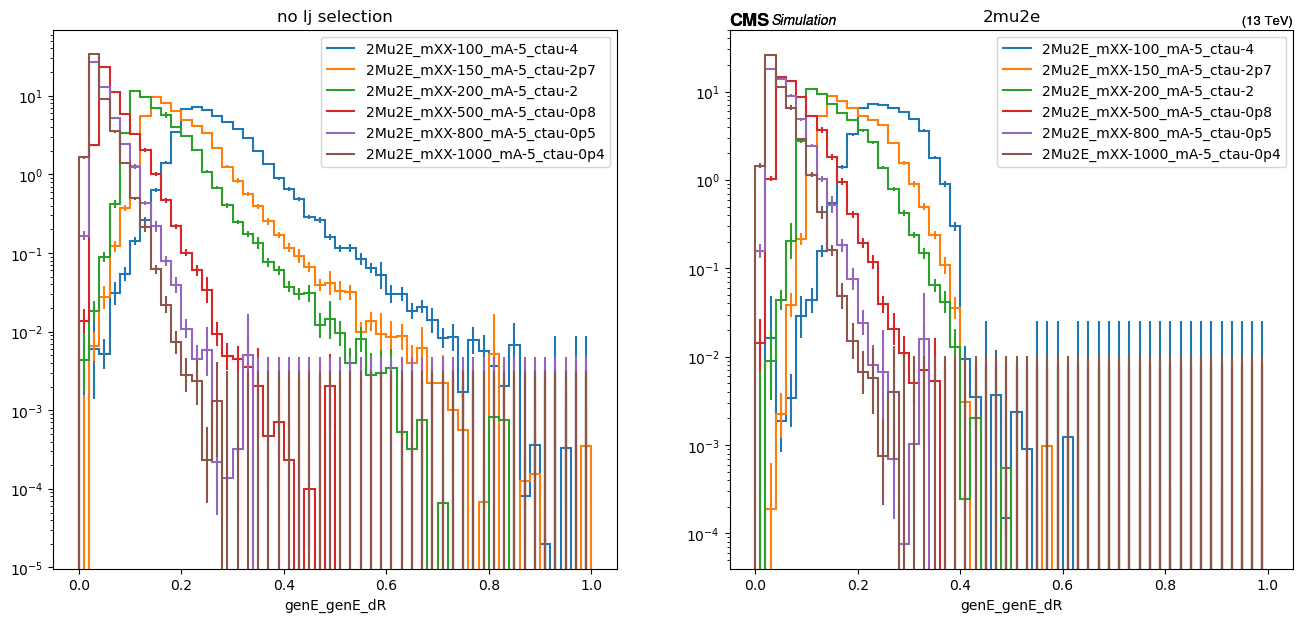

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,7))
ch1 ="no_lj_selection"
ch2="2mu2e"
utilities.plot([output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genE_genE_dR"][ch1,:],
                output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genE_genE_dR"][ch1,:],
                output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genE_genE_dR"][ch1,:],
                output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genE_genE_dR"][ch1,:],
                output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genE_genE_dR"][ch1,:],
                output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genE_genE_dR"][ch1,:]],ax=ax1, density=True)

utilities.plot([output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genE_genE_dR"][ch2,:],
                output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genE_genE_dR"][ch2,:],
                output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genE_genE_dR"][ch2,:],
                output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genE_genE_dR"][ch2,:],
                output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genE_genE_dR"][ch2,:],
                output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genE_genE_dR"][ch2,:]],ax=ax2, density=True)
ax2.legend(["2Mu2E_mXX-100_mA-5_ctau-4", "2Mu2E_mXX-150_mA-5_ctau-2p7", 
            "2Mu2E_mXX-200_mA-5_ctau-2","2Mu2E_mXX-500_mA-5_ctau-0p8",
            "2Mu2E_mXX-800_mA-5_ctau-0p5","2Mu2E_mXX-1000_mA-5_ctau-0p4"])

ax1.legend(["2Mu2E_mXX-100_mA-5_ctau-4", "2Mu2E_mXX-150_mA-5_ctau-2p7", 
            "2Mu2E_mXX-200_mA-5_ctau-2","2Mu2E_mXX-500_mA-5_ctau-0p8",
            "2Mu2E_mXX-800_mA-5_ctau-0p5","2Mu2E_mXX-1000_mA-5_ctau-0p4"])

ax1.set_title("no lj selection")
ax2.set_title("2mu2e")
ax1.set_yscale('log')
ax2.set_yscale('log')

### Here we plot the above same graph for the pairs of muons.

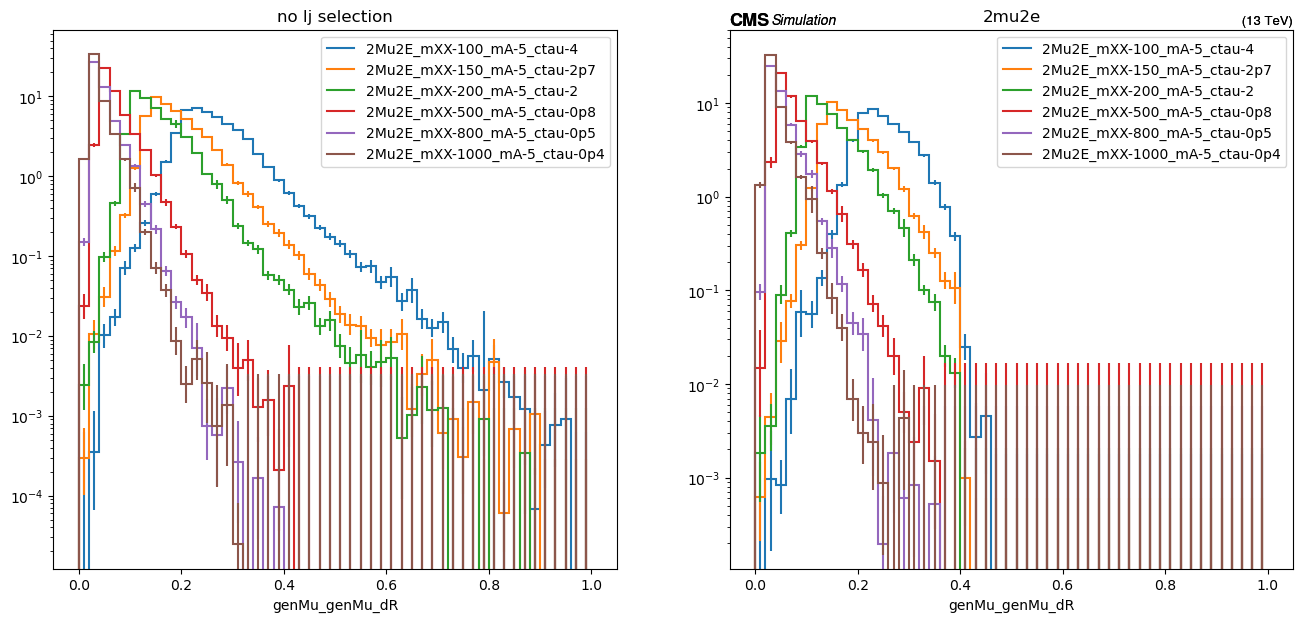

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,7))
utilities.plot([output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genMu_genMu_dR"][ch1,:],
                output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genMu_genMu_dR"][ch1,:],
                output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genMu_genMu_dR"][ch1,:],
                output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genMu_genMu_dR"][ch1,:],
                output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genMu_genMu_dR"][ch1,:],
                output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genMu_genMu_dR"][ch1,:]],ax=ax1, density=True)

utilities.plot([output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genMu_genMu_dR"][ch2,:],
                output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genMu_genMu_dR"][ch2,:],
                output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genMu_genMu_dR"][ch2,:],
                output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genMu_genMu_dR"][ch2,:],
                output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genMu_genMu_dR"][ch2,:],
                output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genMu_genMu_dR"][ch2,:]],ax=ax2, density=True)
ax2.legend(["2Mu2E_mXX-100_mA-5_ctau-4", "2Mu2E_mXX-150_mA-5_ctau-2p7", 
            "2Mu2E_mXX-200_mA-5_ctau-2","2Mu2E_mXX-500_mA-5_ctau-0p8",
            "2Mu2E_mXX-800_mA-5_ctau-0p5","2Mu2E_mXX-1000_mA-5_ctau-0p4"])

ax1.legend(["2Mu2E_mXX-100_mA-5_ctau-4", "2Mu2E_mXX-150_mA-5_ctau-2p7", 
            "2Mu2E_mXX-200_mA-5_ctau-2","2Mu2E_mXX-500_mA-5_ctau-0p8",
            "2Mu2E_mXX-800_mA-5_ctau-0p5","2Mu2E_mXX-1000_mA-5_ctau-0p4"])

ax1.set_title("no lj selection")
ax2.set_title("2mu2e")
ax1.set_yscale('log')
ax2.set_yscale('log')

## Observations we see are the following

###  When the selction is applied the graph is decaying faster. That means the cases with atmost 1 lepton jets have higher $\Delta R$ than that of one with more lepton jets. The "no selection" graph for electron and muon are almost match with that in analysis note figure 4